<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Modules-for-this-notebook" data-toc-modified-id="Modules-for-this-notebook-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Modules for this notebook</a></span></li></ul></li><li><span><a href="#Random-Samples" data-toc-modified-id="Random-Samples-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Random Samples</a></span><ul class="toc-item"><li><span><a href="#An-intuitive-approach" data-toc-modified-id="An-intuitive-approach-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>An intuitive approach</a></span></li></ul></li><li><span><a href="#Choosing-exactly-$m$-terms" data-toc-modified-id="Choosing-exactly-$m$-terms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Choosing exactly $m$ terms</a></span></li><li><span><a href="#Computing-$G_{ER}(n,m)$" data-toc-modified-id="Computing-$G_{ER}(n,m)$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Computing $G_{ER}(n,m)$</a></span></li><li><span><a href="#Computing-$G_{ER}(n,p)$" data-toc-modified-id="Computing-$G_{ER}(n,p)$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Computing $G_{ER}(n,p)$</a></span><ul class="toc-item"><li><span><a href="#Our-own-function" data-toc-modified-id="Our-own-function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Our own function</a></span></li><li><span><a href="#The-gnp_random_graph()-function" data-toc-modified-id="The-gnp_random_graph()-function-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The <code>gnp_random_graph()</code> function</a></span></li></ul></li><li><span><a href="#Expected-size" data-toc-modified-id="Expected-size-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Expected size</a></span></li><li><span><a href="#Expected-Average-Degree" data-toc-modified-id="Expected-Average-Degree-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Expected Average Degree</a></span><ul class="toc-item"><li><span><a href="#$G_{ER}(n,p)$" data-toc-modified-id="$G_{ER}(n,p)$-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>$G_{ER}(n,p)$</a></span></li></ul></li><li><span><a href="#p=p(n)" data-toc-modified-id="p=p(n)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>p=p(n)</a></span></li></ul></div>

<h1>CS4423-Networks: Week 9 (11+12 March 2025) 

# Part 2: Computing Random Graphs
Niall Madden, 
School of Mathematical and Statistical Sciences  
University of Galway


This Jupyter notebook, and PDF and HTML versions, can be found at https://www.niallmadden.ie/2425-CS4423/#Week09

<div class="rc"><font size="-1"><em>This notebook was written by Niall Madden, adapted from notebooks by Angela Carnevale.</em></div>

### Modules for this notebook

In [2]:
import networkx as nx
import numpy as np
opts = { "with_labels": True,  "node_color": "aqua"} # aqua nodes this week

import random   # some random number generators:random, random_choices
import statistics  # e.g., mean of entries in a list
import math     # for comb (=binomial coef)
import matplotlib.pyplot as plt

## Random Samples

* Our goal is to randomly select edges on a given vertex set $X$. That is, pick at random elements from the set $\binom{X}{2}$ of pairs of nodes.

* So we need a procedure
for selecting $m$ from $N$ objects randomly, in such a way that each of the $\binom{N}{m}$
subsets of the $N$ objects is an equally likely outcome.

* We first discuss sampling $m$ values in the range $\{0, 1, \dots, N{-}1\}$.

### An intuitive approach

Maybe the most obvious approach is to select each number in the desired range with probability $p = m/N$.

* `Python`'s basic random number generator `random.random` returns a random number in the (half-open) interval $[0, 1)$ every time it is called.  

* Looping with `a` over `range(N)`: if the randomly generated number is less than $p$, then we include the current value of `a`, if not we don't.

In [3]:
def random_sample_B(N, p):
    """sample elements in range(n) with probability p"""
    sample = []
    for a in range(N):
        if random.random() < p:
            sample.append(a)
    return sample 

In [8]:
random_sample_B(10,0.2)

[0, 2, 3, 4, 5, 8]

In [9]:
random_sample_B(10,0.2)

[2]

In [10]:
random_sample_B(10,0.2)

[0, 9]

We'd expect this to return a list of $pN$ numbers, which it does (on average)

In [20]:
sum_l = 0
N = 100
p = 0.2
for i in range(N):
    S = random_sample_B(N,p)
    sum_l += len(S)
    # print(f"Sample {i:2d} has {len(S)} terms")
print(f"Average is {sum_l/N}")

Average is 19.76


Let's do that for 10,000 runs:

In [22]:
c = 100000
sum(len(random_sample_B(N, p)) for i in range(c))/c

20.0047

## Choosing exactly $m$ terms

To randomly select exactly $m$ numbers from from $0, 1, \dots, N-1$, we use a modification of this procedure 
[see Knuth: The Art of Computer Programming, Vol. 2, Section 3.4.2, Algorithm S] :

* The number $a$ should be selected with probability $\frac{m-c}{N-a}$,
if $c$ items have already been selected.



In [23]:
def random_sample_A(N, m):
    sample = []
    for a in range(N):
        if (N - a) * random.random() < m - len(sample):
            sample.append(a)
    return sample

Let's see a small example.

In [24]:
N = 10
m = 4
print( random_sample_A(N, m) )

[0, 4, 6, 9]


## Computing $G_{ER}(n,m)$ 
We can easily adapt the above procedure to compute examples of graphs in $G_{ER}(n,m)$.

But here we'll use the `networkx` random graph constructor, `gnm_random_graph`, to do this.


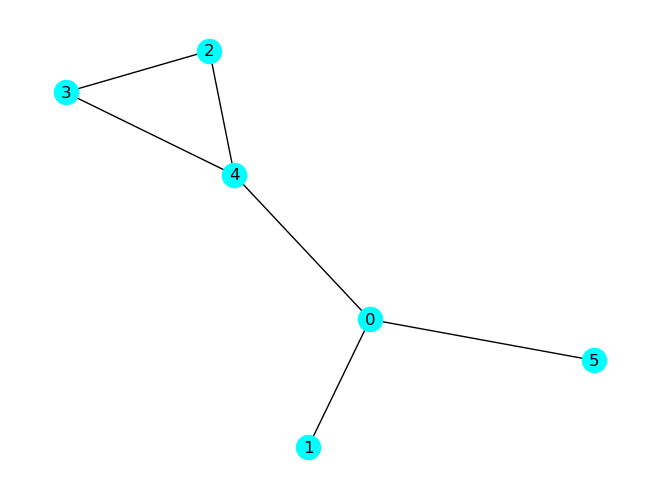

In [39]:
n,m = 6,6
G1 = nx.gnm_random_graph(n, m)
nx.draw(G1, **opts)

## Computing $G_{ER}(n,p)$

### Our own function

Here is a simple approach to computing a sample from $G_{ER}(n,p)$:

In [41]:
def random_graph_B(n, p):
    """construct a random type B graph  with n nodes and edge probability p"""
    G = nx.empty_graph(n)
    for x in range(n):
        for y in range(x):
            if random.random() < p:
                G.add_edge(x, y)
    return G

In [63]:
n = 20
p = 0.2
N = n*(n-1)/2 

CPU times: user 3 μs, sys: 1 μs, total: 4 μs
Wall time: 6.2 μs
G2 has 31 edges. Expeced number is 38.0


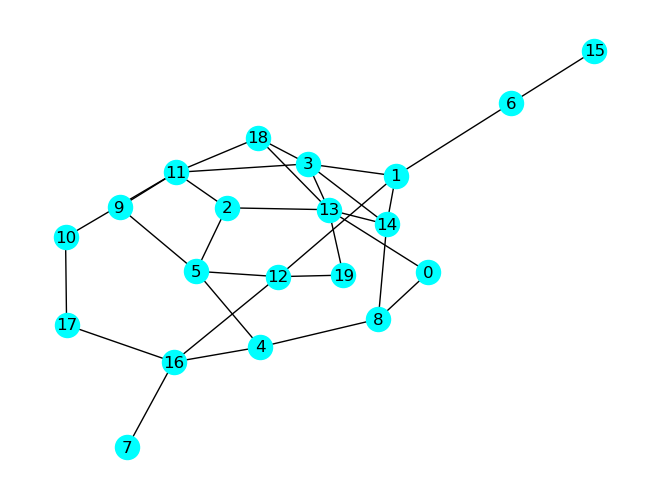

In [64]:
%time
G2 = random_graph_B(n, p)
nx.draw(G2, **opts)
print(f"G2 has {G2.size()} edges. Expeced number is {p*N}")

### The `gnp_random_graph()` function

The `networkx` version of this random graph constructor is called `gnp_random_graph`
and should produce the same random graphs with the same probability (but should be more efficient for large networks).

G3 has 33 edges. Expeced number is 38.0


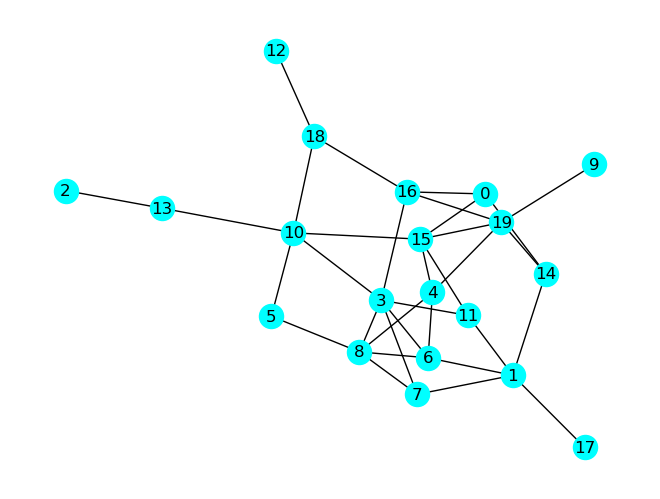

In [66]:
G3 = nx.gnp_random_graph(n, p)
nx.draw(G3, **opts)
print(f"G3 has {G3.size()} edges. Expeced number is {p*N}")

G4 has 118 edges. Expeced number is 99.0


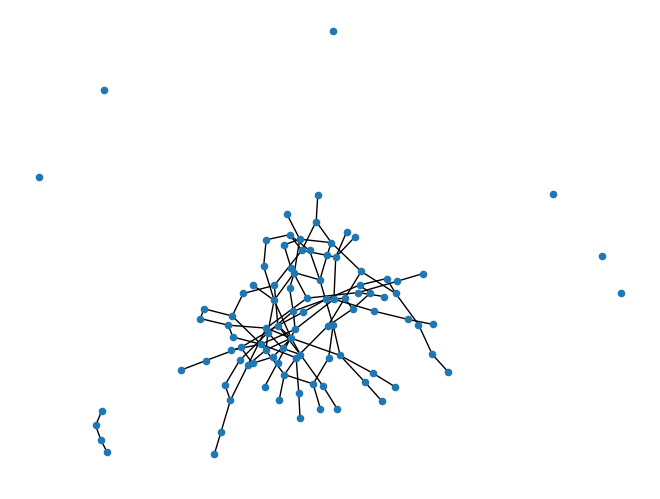

In [67]:
n = 100
p = 0.02
N = n*(n-1)/2 
G4 = nx.gnp_random_graph(n, p)
nx.draw(G4, node_size=20)
print(f"G4 has {G4.size()} edges. Expeced number is {p*N}")
plt.savefig("W09-cover.png")

## Expected size

We know that any graph drawn from $G_{ER}(n,m)$ has size $m$ (with probability 1).

For $G_{ER}(n,p)$ the _expected size_ is $pN$. Let's check that:

In [75]:
n = 100 
N = math.comb(n,2) # "combination" = "binomial coef"
p = 0.01
num_trials = 1000
sum_of_sizes = 0
for i in range(num_trials):
    G = nx.gnp_random_graph(n,p)
    sum_of_sizes += G.size()
ave_size = sum_of_sizes/num_trials
print(f"For this selection, average size is {ave_size}; expected is pN={p*N}")

For this selection, average size is 49.283; expected is pN=49.5


## Expected Average Degree

In [Part 1](https://www.niallmadden.ie/2425-CS4423/W09/CS4423-W09-Part-1.pdf), we noted that, for $G_{ER}(n, m)$, the  the expected **size** of a graph is 
$\bar{m} = m$  as every graph $G$ in $G(n, m)$ has exactly $m$ edges.

It follows that the expected **average degree** is $\langle k \rangle = \frac{2m}{n}$,
as every graph has average degree $2m/n$.

Let's verify that:

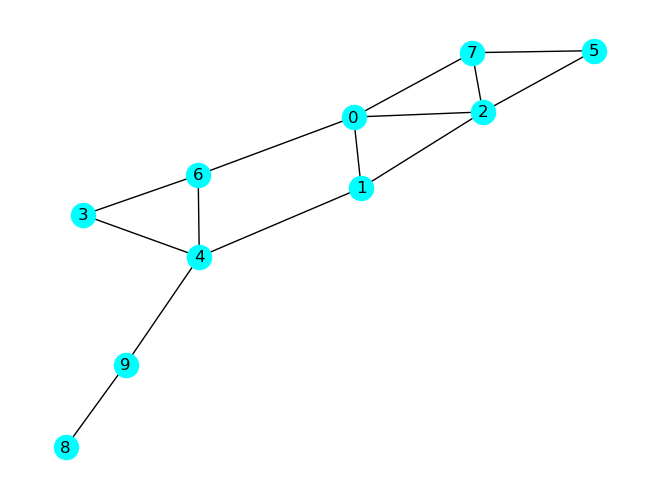

In [76]:
n = 10
m = 14
G = nx.gnm_random_graph(n,m)
nx.draw(G, **opts)

Get the degree sequence:

In [77]:
degree_sequence = [d for n, d in G.degree()]
print(degree_sequence)

[4, 3, 4, 2, 4, 2, 3, 3, 1, 2]


Compute the mean value, and compare with $<k>=2m/n$.

In [78]:
mean_deg = statistics.mean(degree_sequence)
print(f"Averge degree is {mean_deg}, and 2m/n = {2*m/n}")

Averge degree is 2.8, and 2m/n = 2.8


### $G_{ER}(n,p)$
We learned in Part 1 that  the degree distribution in a random graph in $G_{ER}(n, p)$ is a _binomial distribution_
$$
p_k = \binom{n-1}{k}p^k (1-p)^{n-1-k}.
$$
 
That is, in the $G_{ER}(n,p)$ model, the _probability that a node has degree $k$ is $p_k$_.

Let's check some examples.

In Part 1, we considered an example for Q3(c) of the 2023/24 exam paper: suppose one constructed a graph $G$ on 120 nodes by tossing a (fair, 6-sided) die once for each possible edge, adding the edge only if the die shows 3 or 6. Then pick a node at random in this graph. What is the probability
that this node has degree 50?

Set $n$ and $p$ and make a graph

In [79]:
n = 120
p = 1.0/3.0
G = nx.gnp_random_graph(n,p)

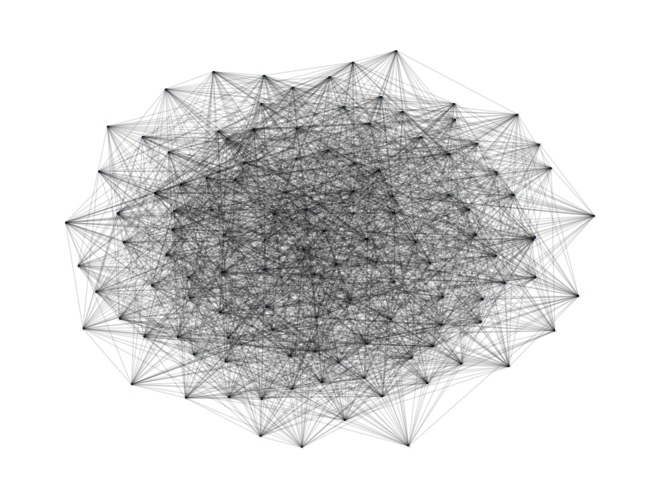

In [83]:
nx.draw(G, node_size=3, alpha=0.1 )

From the theory:

In [95]:
k=50
p50 = math.comb(n-1,k)*(p**k)*(1-p)**(n-1-k)
print(p50)

0.01055531314836434


In practice:

In [96]:
def count_k_in_G(G,k):
    count = 0
    for i in range(n):
        if (G.degree(i) == k):
            count +=1
    return(count)
print(count_k_in_G(G,50)/n)   

0.0


These numbers may not agree terribly well... let's check for all $k$, and plot

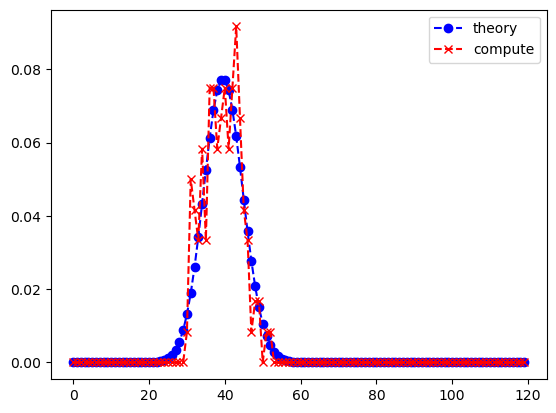

In [97]:
P1 = [math.comb(n-1,k)*(p**k)*(1-p)**(n-1-k) for k in range(n)]
p2 = [count_k_in_G(G,k)/n for k in range(n)]
plt.plot(P1, marker='o', linestyle='--', color='b', label='theory')
plt.plot(p2, marker='x', linestyle='--', color='r', label='compute')
plt.legend()

That looks reasonable, but would be more convincing if we averaged over a number of randomly drawn graphs:

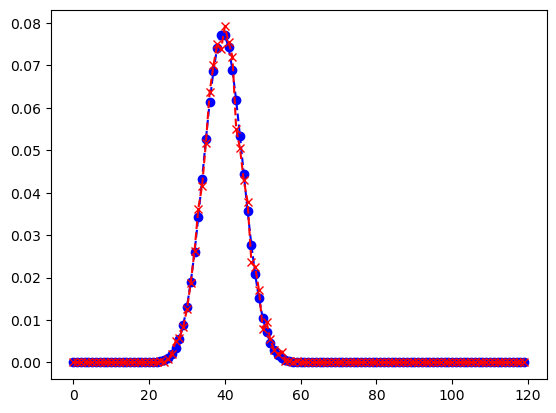

In [103]:
P1 = [math.comb(n-1,k)*(p**k)*(1-p)**(n-1-k) for k in range(n)]
P2 = np.zeros(n)
num_draws = 20
for run in range(num_draws):
    G = nx.gnp_random_graph(n,p)
    P2 = P2 + [count_k_in_G(G,k)/n/num_draws for k in range(n)]

plt.plot(P1, marker='o', linestyle='--', color='b', label='theory')
plt.plot(P2, marker='x', linestyle='--', color='r', label='compute')

## p=p(n)

In a way, it does not make sense to compare $G_{ER}(n_1,p)$ with $G_{ER}(n_2,p)$. If $n_1$ and $n_2$ are very different, the resulting graphs  can have different structures.

Lets look at 2 examples. In both we have $p=0.05$, but we'll have $n_1=100$ and $n_2=20$.


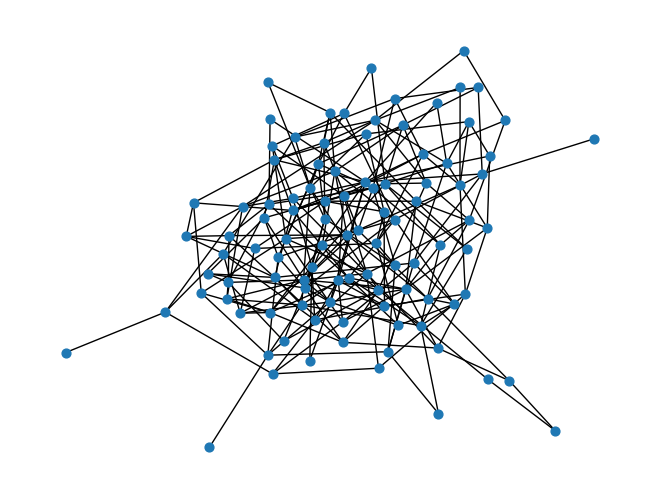

In [118]:
n1 = 100
p = 0.05
G1 = nx.gnp_random_graph(n1,p)
nx.draw(G1, node_size=40)

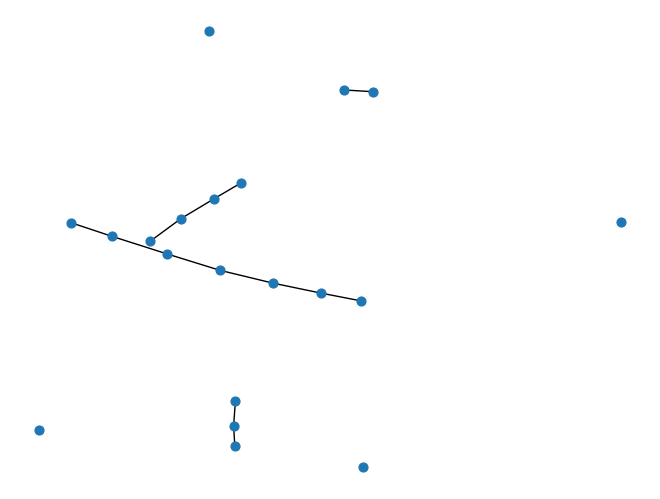

In [125]:
n2 = 20
G2 = nx.gnp_random_graph(n2,p)
nx.draw(G2, node_size=40)

**FINISHED HERE THURSDAY**

This will lead us to a discussion on "The Giant Connected Component".

**Definition (Giant Component).**
A connected component of a graph $G$ is called a **giant component**
if its number of nodes increases with the order $n$ of $G$ as
some positive power of $n$.


